**Imports**

In [1]:
import pandas as pd
import numpy as np
import pydataset
import matplotlib.pyplot as plt #For saving images

import pyplotterlib.standard.plotters as ppl

**1) Process the data set**

In [2]:
def _getFractMonth(inpDateTime):
    return inpDateTime.month + (inpDateTime.day / inpDateTime.days_in_month)


#Manipulate the dataframe
DF = pydataset.data("airquality")
DF["year"] = 1973
DF.rename(columns={"Month":"month", "Day":"day"}, inplace=True)
DF["dateTimes"] = pd.to_datetime({"month":DF["month"], "year":DF["year"], "day":DF["day"]})
DF["fractMonths"] = DF["dateTimes"].apply(_getFractMonth)
DF["SolarRolling"] = DF.rolling(window=2)["Solar.R"].mean()

#Extract data for each plot
ozonePlotData = [ DF[["fractMonths","Ozone"]].to_numpy() ]
solarPlotData = [ DF[["fractMonths","SolarRolling"]].to_numpy()  ]
windPlotData  = [ DF[["fractMonths","Wind"]].to_numpy()  ]
tempPlotData  = [ DF[["fractMonths","Temp"]].to_numpy()  ]


**2)Create a template plotter with the shared options**

In [3]:
currKwargs = {"lineStyles":["-"],
              "lineMarkerStyles":["x"],
              "tickMarkerValsX":[5,6,7,8,9],
              "tickMarkerLabelsX":["May","Jun","Jul","Aug","Sept"],
              "xLabelStr":"Month (in 1973)"}
templPlotter = ppl.LinePlotter(**currKwargs)



**3) Create individual plotters for each; leaving out xLabels on the top-two**

In [4]:
#Ozone
currKwargs = {"lineColors":'r',
              "plotData":ozonePlotData,
              "xLabelStr":None,
              "yLabelStr":"Ozone Concentration (ppb)"}
ozonePlotter = templPlotter.createFactory(**currKwargs)

#Solar radiation
currKwargs = {"lineColors":'g',
              "plotData":solarPlotData,
              "xLabelStr":None,
              "yLabelStr":"Solar Radiation (Ly)"}
solarPlotter = templPlotter.createFactory(**currKwargs)

#Wind
currKwargs = {"lineColors":'b',
              "plotData":windPlotData,
              "yLabelStr":"Wind Speed (mph)"}
windPlotter = templPlotter.createFactory(**currKwargs)

#Temperature
currKwargs = {"lineColors":['orange'],
              "plotData":tempPlotData,
              "yLabelStr":"Temperature (Fahrenheit)"}

tempPlotter = templPlotter.createFactory(**currKwargs)


**4) Create a Multi Plotter**

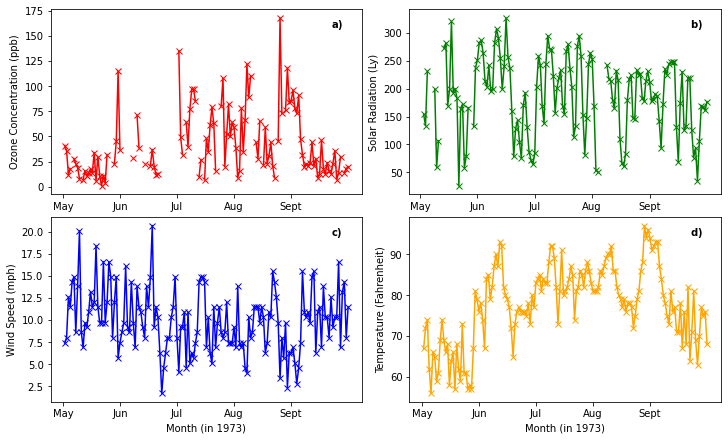

In [5]:
currKwargs = {
              "annotateLabelPosFract":[[0.9,0.9]],
              "annotateLabelStrings_useBoldedLowerAlphabetByDefault":True,
              "constrainedLayout":True,
              "figHeightPerRow":3,
              "figWidthPerCol":5,
              "nColsGrid":2,
              "plotters":[ozonePlotter, solarPlotter, windPlotter, tempPlotter]
              }
multiPlotter = ppl.RectMultiPlotter(**currKwargs)

multiPlotOutput = multiPlotter.createPlot()
plt.savefig("rectMultiPlotter_imgA")